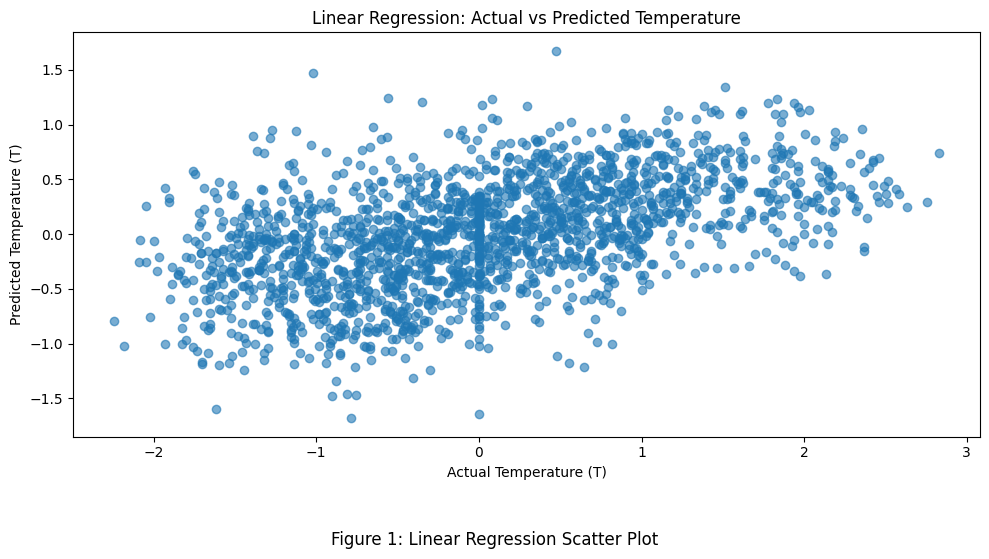

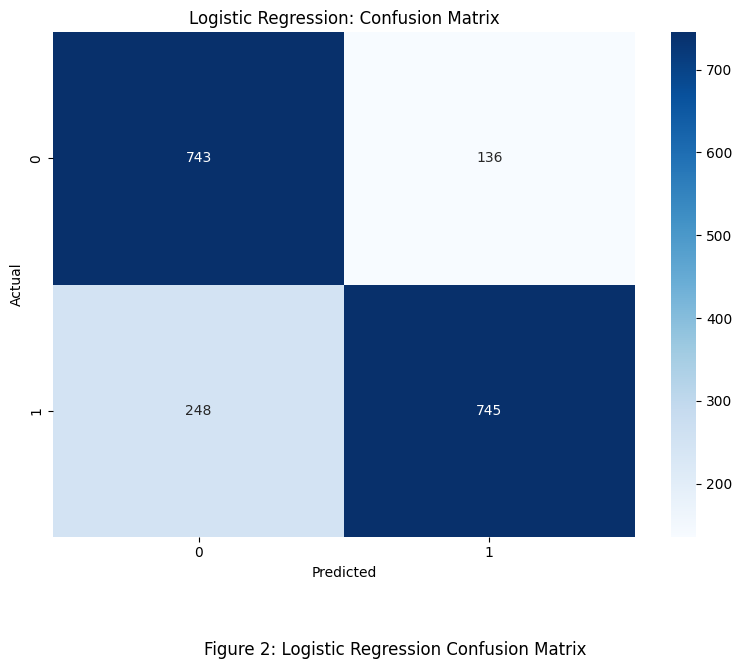

Linear Regression Results:
Mean Squared Error: 0.7620336569082751
R^2 Score: 0.254378181382921

Logistic Regression Results:
Accuracy: 0.7948717948717948
Precision: 0.8456299659477866
Recall: 0.7502517623363545
F1 Score: 0.7950907150480256


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Air Quality dataset
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# Data Cleaning and Preprocessing
# Replace invalid values and drop unnecessary columns
data = data.replace(-200, np.nan)
data = data.dropna(how='all', axis=1).dropna(how='all')

# Select relevant columns and handle missing values
data = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'T']]
data.fillna(data.mean(), inplace=True)

# Standardize numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Define Linear Regression target and features
X_linear = data_scaled[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)']]
y_linear = data_scaled['T']

# Train-Test Split
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# Predictions and Evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test_linear)
mse = mean_squared_error(y_test_linear, y_pred_linear)
r2 = r2_score(y_test_linear, y_pred_linear)

# Define Logistic Regression target and features
# Create binary target based on CO(GT) levels
X_logistic = data_scaled[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)']]
data_scaled['High_CO'] = (data['CO(GT)'] > 2).astype(int)
y_logistic = data_scaled['High_CO']

# Train-Test Split
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Predictions and Evaluation for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)

# Visualizations
# Figure 1: Linear Regression Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.6)
plt.xlabel('Actual Temperature (T)')
plt.ylabel('Predicted Temperature (T)')
plt.title('Linear Regression: Actual vs Predicted Temperature')
plt.figtext(0.5, -0.1, 'Figure 1: Linear Regression Scatter Plot', wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

# Figure 2: Logistic Regression Confusion Matrix
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figtext(0.5, -0.1, 'Figure 2: Logistic Regression Confusion Matrix', wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()


# Results Output
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [4]:
# Air Quality Analysis

# Step 1: Import Necessary Libraries
# Import the required libraries for data analysis
import pandas as pd
import numpy as np

# Step 2: Load the Dataset
# Load the Air Quality dataset using pandas
# The dataset contains information about air quality and various pollutants
file_path = 'AirQualityUCI.csv'  # Update with your dataset path
data = pd.read_csv(file_path, sep=';', decimal=',')

# Step 3: Explore the Dataset
# Display the first few rows of the dataset to get an overview
print("First 5 rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nDataset Information:")
data.info()

# Display summary statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

# Step 4: Handle Missing Values
# Replace invalid values (-200) with NaN for proper handling
print("\nReplacing invalid values (-200) with NaN...")
data.replace(-200, np.nan, inplace=True)

# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Fill missing values with column means, but only for numeric columns
print("\nFilling missing values with column means for numeric columns...")
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify that missing values are handled
print("\nRemaining Missing Values in Each Column:")
print(data.isnull().sum())

# Step 5: Save Preprocessed Dataset
# Save the preprocessed dataset for further analysis
preprocessed_file_path = 'Preprocessed_AirQuality.csv'
data.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed dataset saved to {preprocessed_file_path}")


First 5 rows of the dataset:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN   